### MultiClass Classification Using Naive bayes, SVC, Logistic Rregression. Applying PCA, LDA in an Image Dataset.

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# You may need some sklearn specific imports, or other standard toolboxes
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from google.colab import drive


## Load dataset

In [ ]:

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainingset = np.loadtxt('/content/drive/MyDrive/StarterFile/training.csv', delimiter=',')
testingset = np.loadtxt('/content/drive/MyDrive/StarterFile/test.csv', delimiter=',')



## Split data

In [ ]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [ ]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


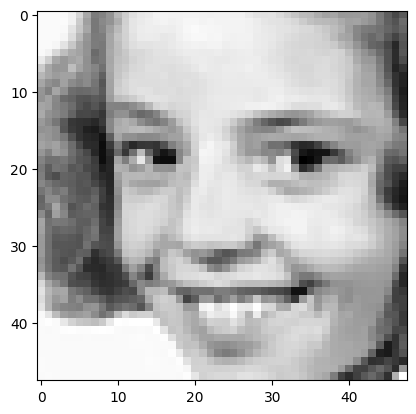

facial emotion: happy


In [ ]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

### Filtering Happy and Sad faces from the dataset

In [ ]:
# YOUR CODE HERE
# Select happy and sad faces from the training set
happy_sad_training = np.where((y_training[:, 3] == 1) | (y_training[:, 4] == 1))[0]
x_training_hs = x_training[happy_sad_training]
y_training_hs = y_training[happy_sad_training]

# Select happy and sad faces from the testing set
happy_sad_testing = np.where((y_testing[:, 3] == 1) | (y_testing[:, 4] == 1))[0]
x_testing_hs = x_testing[happy_sad_testing]
y_testing_hs = y_testing[happy_sad_testing]

In [ ]:
# Checking shape of the dataset
x_training_hs.shape

(12045, 48, 48)

In [ ]:
x_training_hs[0].shape

(48, 48)

In [ ]:
# Reshaping the dataset to apply PCA (Making 2D from 3D)
x_training_hs_reshaped = x_training_hs.reshape(-1, 48*48)
x_testing_hs_reshaped=x_testing_hs.reshape(-1, 48*48)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Created a scaler object
scaler = StandardScaler()

# Normalizing training data
x_training_hs_normalized = scaler.fit_transform(x_training_hs_reshaped)

# Normalizing testing data
x_testing_hs_normalized = scaler.transform(x_testing_hs_reshaped)

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

### Determining appropriate number of components to use in PCA using cumulative variance





Number of components explaining 95% variance: 242


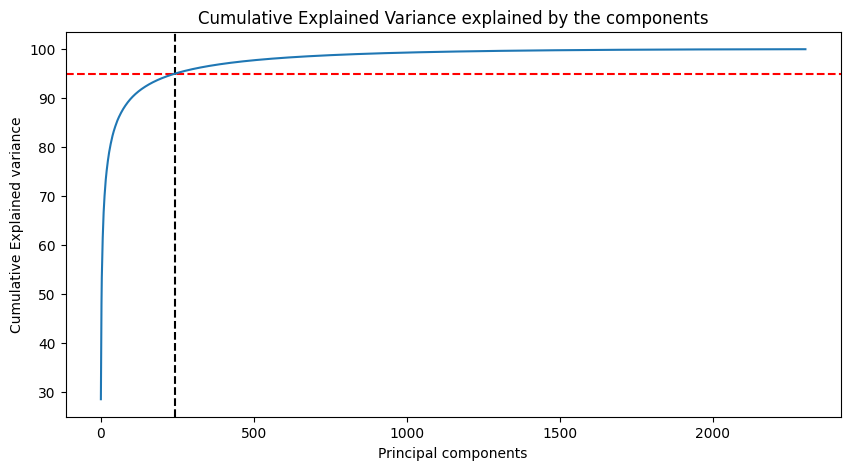

In [ ]:

# Apply PCA to the happy and sad face training data
pca = PCA()
pca.fit(x_training_hs_normalized)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

# Plot the cumulative explained variance
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

- *Applying* cumullative variance we see that 242 are the optimal number of components that have 95% of the variance explained in the image.



### PCA



In [ ]:


# Apply PCA to the happy and sad faces in the training set
pca = PCA(n_components=242)  # reduce to 2 dimensions
x_training_hs_pca = pca.fit_transform(x_training_hs_normalized.reshape(-1, 48*48))
x_testing_hs_pca = pca.transform(x_testing_hs_normalized.reshape(-1, 48*48))



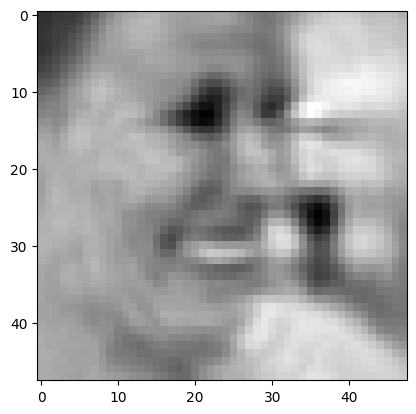

facial emotion: happy


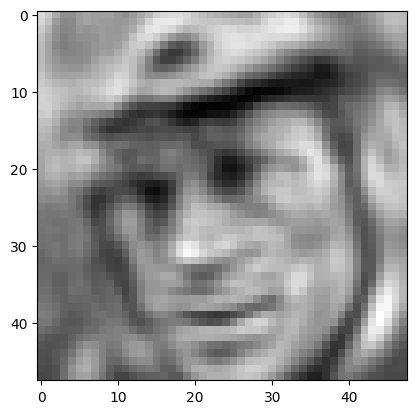

facial emotion: sad


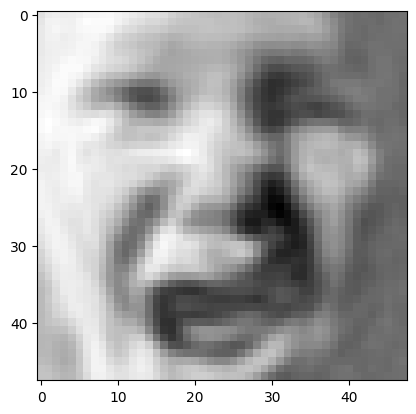

facial emotion: happy


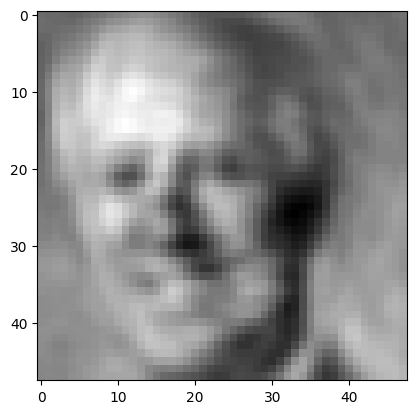

facial emotion: sad


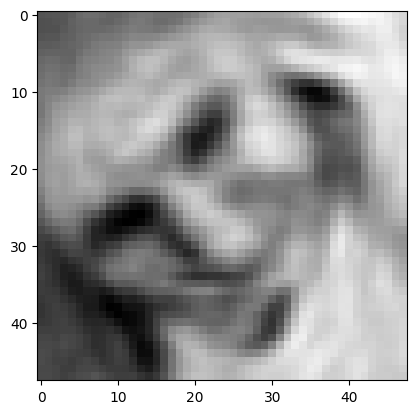

facial emotion: sad


In [ ]:
# Select 5 random indexes
indexes = np.random.randint(0, 1000, 5)

for index in indexes:
    sample_pca = x_training_hs_pca[index, :]
    sample_orig = pca.inverse_transform(sample_pca).reshape(48*48)

    # Reshape the array to 48x48
    sample_orig = sample_orig.reshape(48, 48)

    plt.imshow(sample_orig, cmap='gray')
    plt.show()
    print('facial emotion: %s' % get_emotion(y_testing_hs[index, :]))

### Determining appropriate number of components to use in LDA using cumulative variance using

Number of components explaining 95% variance: 243


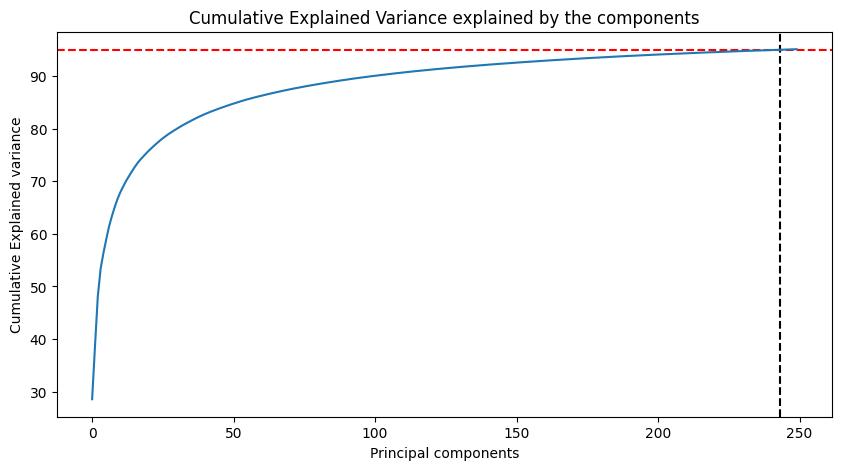

In [ ]:

lda = LDA()
# Apply LDA to the happy and sad face training data

lda.fit(x_training_hs_reshaped,y_training_hs[:, 3])

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

# Plot the cumulative explained variance
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

### LDA

In [ ]:
lda = LDA(n_components=1)
x_training_hs_lda = lda.fit_transform(x_training_hs_pca, y_training_hs[:, 3])
x_testing_hs_lda = lda.transform(x_testing_hs_pca)

In [ ]:
x_training_hs_lda.shape

(12045, 1)

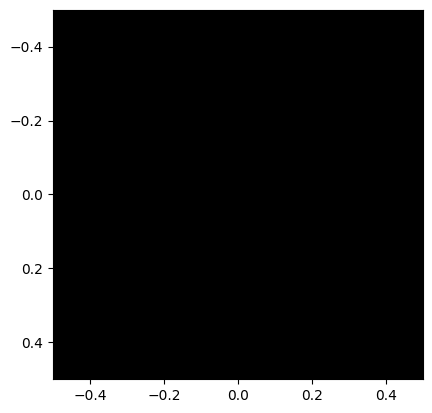

facial emotion: happy


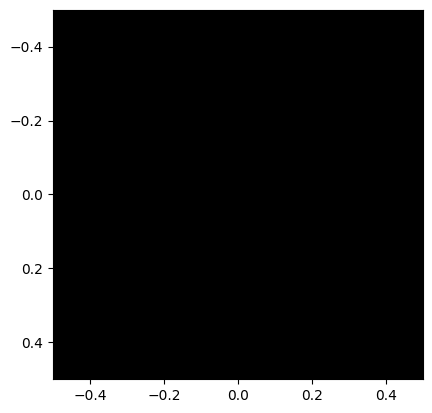

facial emotion: fear


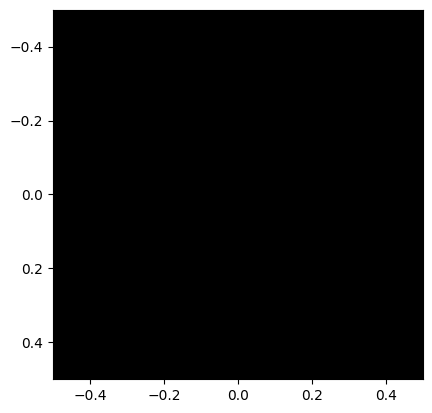

facial emotion: neutral


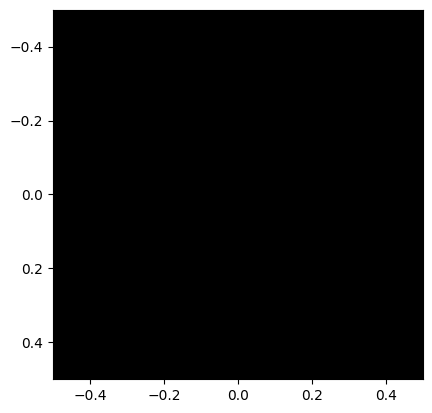

facial emotion: angry


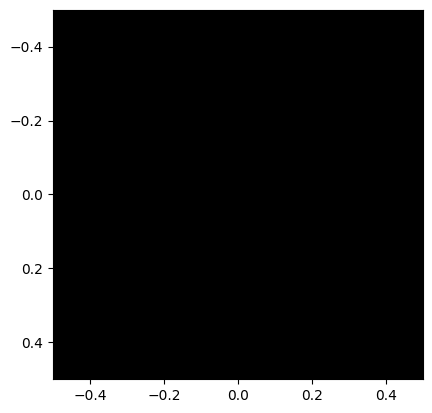

facial emotion: happy


In [ ]:
indexes = np.random.randint(0, 1000, 5)
for index in indexes:
      sample_lda = x_training_hs_lda[index, :]
      sample_lda = sample_lda.reshape(1, -1)
      plt.imshow(sample_lda, cmap='gray')
      plt.show()
      print('facial emotion: %s' % get_emotion(y_training[index, :]))

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train a Naive Bayes classifier on the happy/sad faces
nb = GaussianNB()
nb.fit(x_training_hs_normalized, y_training_hs[:, 3])  # use happy/sad labels (index 3)
y_pred_train=nb.predict(x_training_hs_normalized)

# Predict happy/sad labels for the testing set
y_pred = nb.predict(x_testing_hs_normalized)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.590


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_training_hs[:, 3], y_pred_train)
print(f"Training Accuracy for Naive Bayes: {accuracy:.3f}")
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Testing Accuracy for Naive Bayes: {accuracy:.3f}")

Training Accuracy for Naive Bayes: 0.601
Testing Accuracy for Naive Bayes: 0.590


### NAIVE BAYES with PCA

In [ ]:


# Train a Naive Bayes classifier on the happy/sad faces
nb = GaussianNB()
nb.fit(x_training_hs_pca, y_training_hs[:, 3])  # use happy/sad labels (index 3)
y_pred_train = nb.predict(x_training_hs_pca)

# Predict happy/sad labels for the testing set
y_pred = nb.predict(x_testing_hs_pca)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.576


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_training_hs[:, 3], y_pred_train)
print(f"Training Accuracy for Naive Bayes with PCA: {accuracy:.3f}")
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Testing Accuracy for Naive Bayes with PCA: {accuracy:.3f}")

Training Accuracy for Naive Bayes with PCA: 0.608
Testing Accuracy for Naive Bayes with PCA: 0.576


### Classification report NAIVE BAYES

In [ ]:
# Classification Report for naive bayes
print(classification_report(y_testing_hs[:, 3], y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       653
         1.0       0.66      0.60      0.63       895

    accuracy                           0.59      1548
   macro avg       0.59      0.59      0.59      1548
weighted avg       0.60      0.59      0.59      1548









[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

### LOGISTIC REGRESSION without PCA

In [ ]:
# YOUR CODE HERE


# Train a Logistic Regression classifier on the happy/sad faces
lr = LogisticRegression()
lr.fit(x_training_hs_normalized, y_training_hs[:, 3])  # use happy/sad labels (index 3)

y_pred_train=lr.predict(x_training_hs_normalized)

# Predict happy/sad labels for the testing set
y_pred = lr.predict(x_testing_hs_normalized)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.680


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_training_hs[:, 3], y_pred_train)
print(f"Training Accuracy for Logistic Regression: {accuracy:.3f}")
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Testing Accuracy for logistic Regression: {accuracy:.3f}")

Training Accuracy for Logistic Regression: 0.771
Testing Accuracy for logistic Regression: 0.680


### LOGISTIC REGRESSION with PCA

In [ ]:
# Train a Logistic Regression classifier on the happy/sad faces
lr = LogisticRegression()
lr.fit(x_training_hs_pca, y_training_hs[:, 3])  # use happy/sad labels (index 3)

y_pred_train=lr.predict(x_training_hs_pca)

# Predict happy/sad labels for the testing set
y_pred = lr.predict(x_testing_hs_pca)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.711


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_training_hs[:, 3], y_pred_train)
print(f"Training Accuracy for Logistic Regression with PCA: {accuracy:.3f}")
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Testing Accuracy for logistic Regression with PCA: {accuracy:.3f}")

Training Accuracy for Logistic Regression with PCA: 0.724
Testing Accuracy for logistic Regression with PCA: 0.711


### CLassification Report for LOGISTIC REGRESSION

In [ ]:
# Classification Report for Logistic Regression
print(classification_report(y_testing_hs[:, 3], y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.54      0.60       653
         1.0       0.71      0.81      0.76       895

    accuracy                           0.70      1548
   macro avg       0.69      0.67      0.68      1548
weighted avg       0.69      0.70      0.69      1548



[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

### SVM

In [ ]:
# YOUR CODE HERE

# Train an SVM classifier with a radial basis function (RBF) kernel
svm = SVC(kernel='rbf', C=10, gamma=0.1)
svm.fit(x_training_hs_reshaped, y_training_hs[:, 3])  # use happy/sad labels (index 3)

# Predict happy/sad labels for the testing set
y_pred = svm.predict(x_testing_hs_reshaped)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_testing_hs[:, 3], y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.595


### Classification Report for SVM

In [ ]:
# Classification report for SVM

print(classification_report(y_testing_hs[:, 3], y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.04      0.08       653
         1.0       0.59      1.00      0.74       895

    accuracy                           0.59      1548
   macro avg       0.79      0.52      0.41      1548
weighted avg       0.76      0.59      0.46      1548



[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

Based on the results, we choose Logistic Regression with pca as the best model for detecting happiness and sadness. It has the highest accuracy rate (0.71) and is good at identifying both happy and sad faces.
Logistic Regression performs better than Naive Bayes which showed maximum accuracy of (0.68) on test set and SVM and naive Bayes showing (0.59), which have lower accuracy rates and struggle to identify happy or sad faces.
Therefore, we select Logistic Regression as the most reliable model for this task

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5

---

saddest faces.

In [ ]:
# predicting Probability of happiest and saddest faces
y_pred_proba = lr.predict_proba(x_testing_hs_reshaped)[:, 1]


In [ ]:
# Sorting the faces on probability choosing last 5 as happiest and first 5 as saddest
happiest_faces = np.argsort(y_pred_proba)[-5:]
saddest_faces = np.argsort(y_pred_proba)[:5]

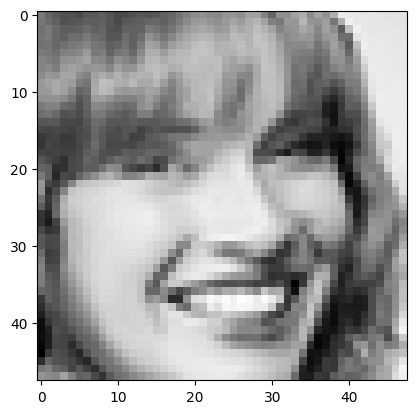

Happy face 626


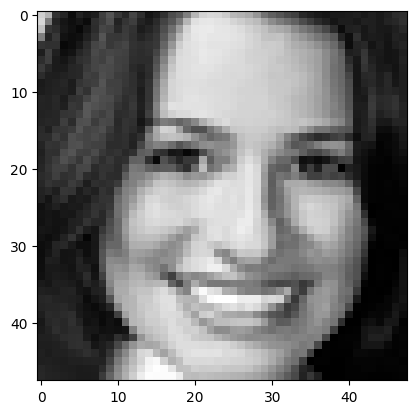

Happy face 475


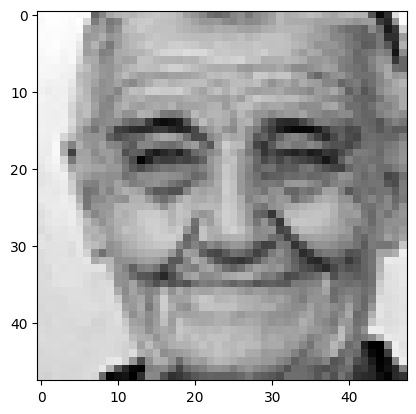

Happy face 784


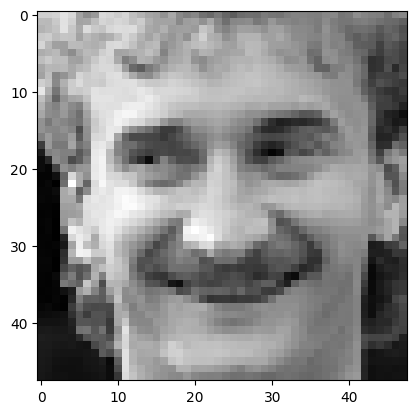

Happy face 1137


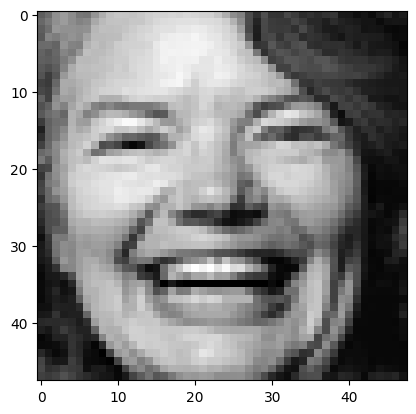

Happy face 609


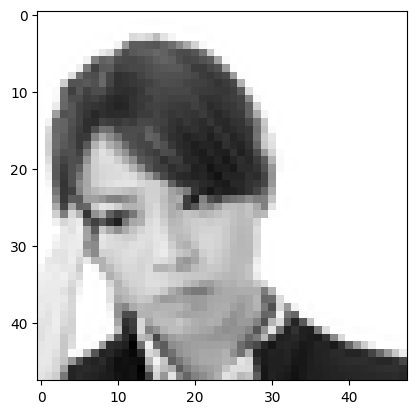

Sad face 1546


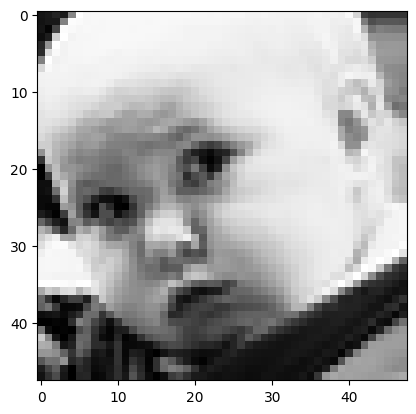

Sad face 136


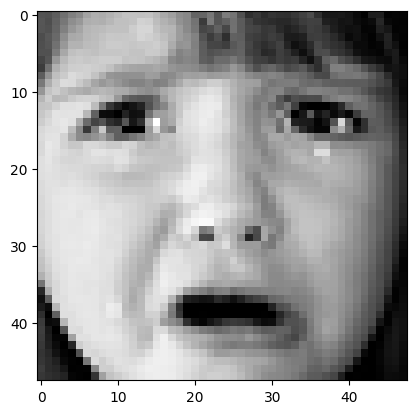

Sad face 350


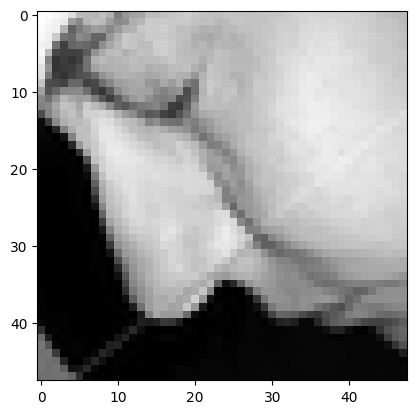

Sad face 1050


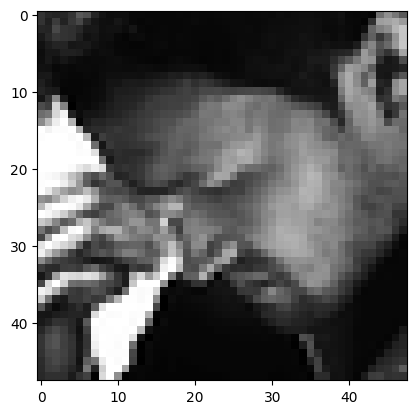

Sad face 1290


In [ ]:
# Generating image visuals for top 5 happiest and saddest faces
for index in happiest_faces:
      plt.imshow(x_testing_hs[index, :].reshape(48, 48), cmap='gray')
      plt.show()
      print(f"Happy face {index+1}")

for index in saddest_faces:
      plt.imshow(x_testing_hs[index, :].reshape(48, 48), cmap='gray')
      plt.show()
      print(f"Sad face {index+1}")

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes.

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [ ]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training_img = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing_img = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped
y_training.shape,y_testing.shape

((28709, 7), (3589, 7))

### PCA

In [ ]:
# Apply PCA (replace 0.95 with your desired explained variance ratio)
pca = PCA(n_components=0.95, svd_solver='full')  # Reduce to 95% variance
pca.fit(x_training)

# Get the transformed data (i.e., principal components)
x_pca = pca.transform(x_training)

print("Original data shape:", x_training.shape)
print("Transformed data shape after PCA:", x_pca.shape)

Original data shape: (28709, 2304)
Transformed data shape after PCA: (28709, 253)


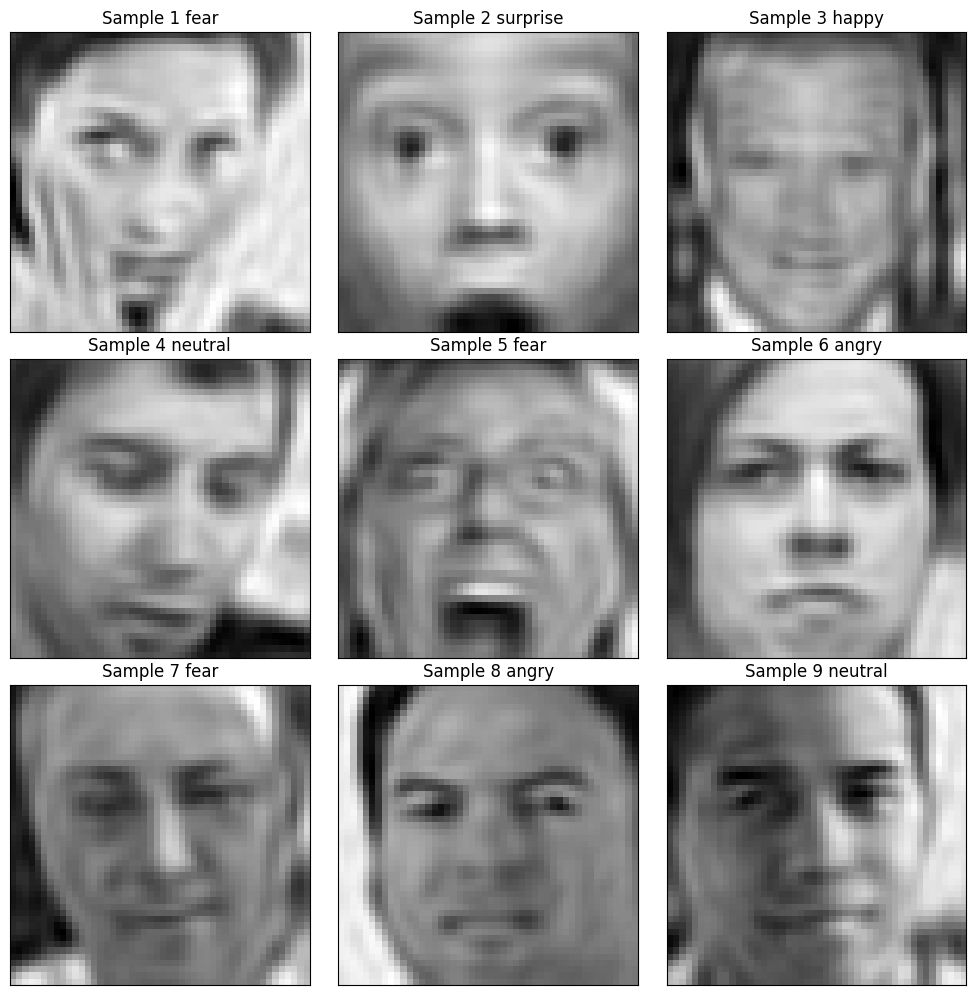

In [ ]:
num_images = 9  # Adjust for 3x3 grid (9 images)
num_cols = 3  # Number of images per row (3 for 3x3)
num_rows = num_images // num_cols  # Number of rows (3 for 3x3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Create subplots

# Loop and display images
for i in range(num_images):
  row = i // num_cols  # Calculate row index
  col = i % num_cols  # Calculate column index

  sampleindex = np.random.randint(0, 1000)  # Generate random index
  sample_pca = x_pca[sampleindex, :]  # Get sample PCA components

  sample_reconstructed = pca.inverse_transform(sample_pca.reshape(1, -1))  # Project back
  sample = sample_reconstructed.reshape(48, 48)  # Reshape to image dimensions

  # Display image in current subplot
  axes[row, col].imshow(sample, cmap='gray')
  axes[row, col].set_title(f"Sample {i+1} {get_emotion(y_training[sampleindex, :])}")  # Add title
  axes[row, col].set_xticks([])  # Hide x-axis ticks
  axes[row, col].set_yticks([])  # Hide y-axis ticks


  # Adjust layout
  fig.tight_layout()

### LDA

In [ ]:
# Apply LDA
lda = LDA(n_components=n_classes-1)
lda.fit(x_pca, y_training.argmax(axis=1))  # Use class labels (argmax)

# Get the transformed data (i.e., LDA components)
x_lda = lda.transform(x_pca)

print("PCA transformed data shape:", x_pca.shape)

print("LDA transformed data shape:", x_lda.shape)

PCA transformed data shape: (28709, 253)
LDA transformed data shape: (28709, 6)


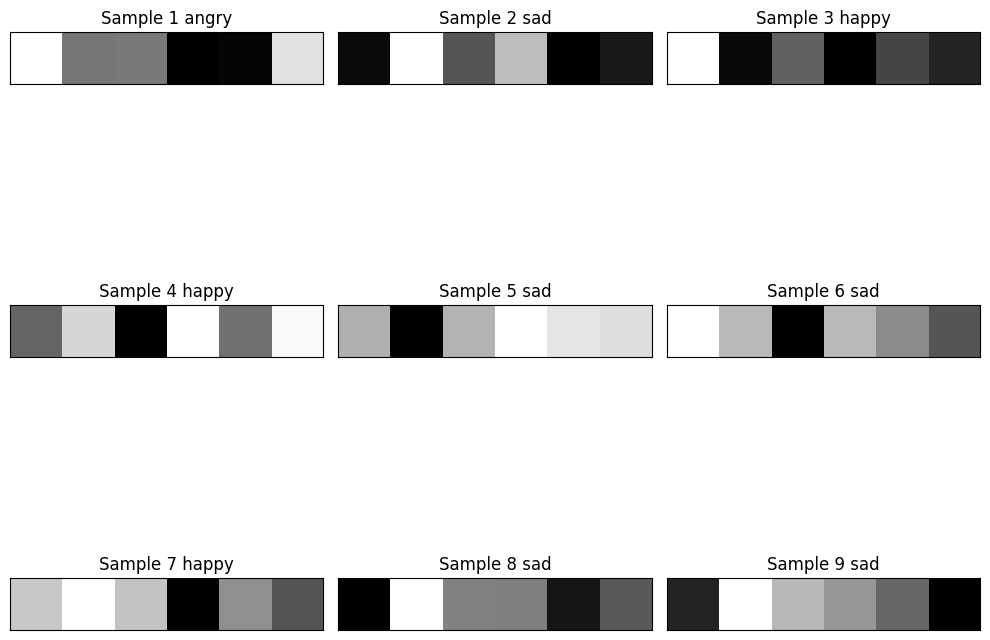

In [ ]:
num_images = 9  # Adjust for 3x3 grid (9 images)
num_cols = 3  # Number of images per row (3 for 3x3)
num_rows = num_images // num_cols  # Number of rows (3 for 3x3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Create subplots

# Loop and display images
for i in range(num_images):
  row = i // num_cols  # Calculate row index
  col = i % num_cols  # Calculate column index

  sampleindex = np.random.randint(0, 1000)  # Generate random index
  sample_lda = x_lda[sampleindex, :]  # Get sample PCA components

  axes[row, col].imshow(sample_lda.reshape(1, -1), cmap='gray')
  axes[row, col].set_title(f"Sample {i+1} {get_emotion(y_training[sampleindex, :])}")
  axes[row, col].set_xticks([])  # Hide x-axis ticks
  axes[row, col].set_yticks([])  # Hide y-axis ticks


  # Adjust layout
fig.tight_layout()
plt.show()

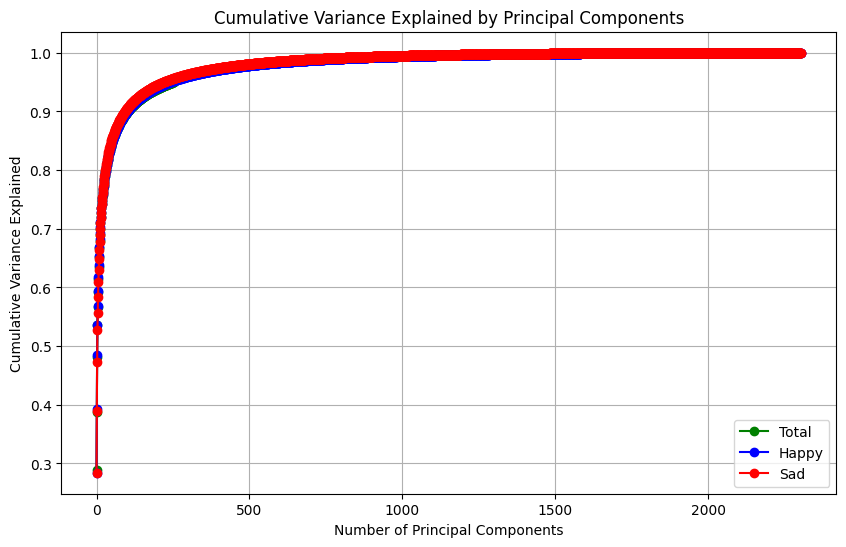

In [ ]:
# Cumulative variance for Total Dataset
cumulative_variance_total = np.cumsum(pca.explained_variance_ratio_)

# Perform PCA for happy faces
happy_set=x_training[np.where((y_training[:, 3] == 1))]
sad_set=x_training[np.where((y_training[:, 4] == 1))]

# Reshaping the dataset to apply PCA (Making 2D from 3D)
happy_set_reshaped = happy_set.reshape(-1, 48*48)
sad_set_reshaped=sad_set.reshape(-1, 48*48)

pca_happy = PCA()
pca_happy.fit(happy_set)
cumulative_variance_happy = np.cumsum(pca_happy.explained_variance_ratio_)

# Perform PCA for sad faces
pca_sad = PCA()
pca_sad.fit(sad_set)
cumulative_variance_sad = np.cumsum(pca_sad.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_total, marker='o', linestyle='-', color='g', label='Total')
plt.plot(cumulative_variance_happy, marker='o', linestyle='-', color='b', label='Happy')
plt.plot(cumulative_variance_sad, marker='o', linestyle='-', color='r', label='Sad')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

Green Line depict the cumulative variance explained with increasing numbers of principal components.

-Green Line: Represents all classes.

-Blue Line: Represents happy classes.

-Red Line: Represents sad classes.

The similarity between these lines suggests that the variance explained by principal components is consistent across both subsets of data. The curve begins steeply and levels off, approaching nearly 100% cumulative variance explained after approximately 2000 principal components. This indicates that a significant portion of the data's variance can be captured by a relatively small number of principal components.

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Flatten y_training and y_testing to get single labels
y_train_labels = np.argmax(y_training, axis=1)
y_test_labels = np.argmax(y_testing, axis=1)

# Train the Naive Bayes classifier
nb_classifier.fit(x_training, y_train_labels)

# Predict using the trained classifier
y_pred = nb_classifier.predict(x_testing)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
y_pred_train = nb_classifier.predict(x_training)
train_accuracy = accuracy_score(y_train_labels,y_pred_train)
print(f'Accuracy of Naive Bayes classifier: {accuracy:.2f}')
print(f' train Accuracy of Naive Bayes classifier: {train_accuracy:.2f}')
y_pred,y_test_labels

Accuracy of Naive Bayes classifier: 0.23
 train Accuracy of Naive Bayes classifier: 0.22


(array([5, 5, 1, ..., 5, 6, 4]), array([0, 1, 4, ..., 4, 4, 4]))

In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_train_labels, y_pred_train)
print(f"Training Accuracy for Naive Bayes Multi-classification: {accuracy:.3f}")
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Testing Accuracy for Naive Bayes Multi-classification: {accuracy:.3f}")

Training Accuracy for Naive Bayes Multi-classification: 0.222
Testing Accuracy for Naive Bayes Multi-classification: 0.227


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

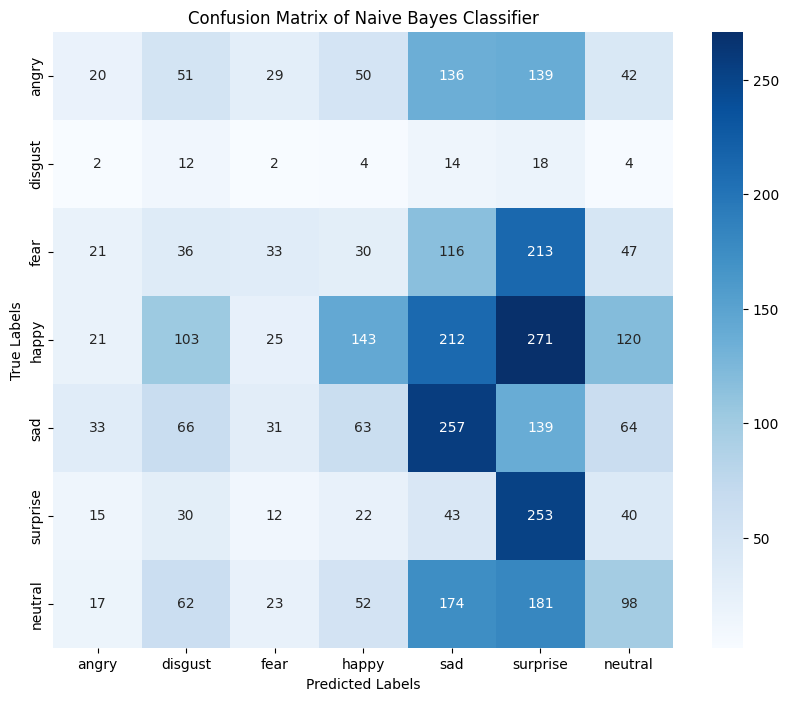

In [ ]:


# Map numeric labels to emotion labels
emotion_labels = [get_emotion(np.array([i])) for i in range(7)]
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()


- Naive Bayes classifiers treat multi-class classification problems by estimating the probability of each class given the input features. The classifier assigns the class label with the highest probability to each sample. For Gaussian Naive Bayes, it assumes that the features follow a Gaussian (normal) distribution. Each class has its own distribution parameters (mean and variance), and the classifier uses these parameters to compute the likelihood of each class.


[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

LOGISTIC REGRESSION

In [ ]:
# YOUR CODE HERE
# using Logistic
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg_classifier = LogisticRegression(max_iter=1000)

# Train the logistic regression model
log_reg_classifier.fit(x_training, y_train_labels)

# Predict using the trained logistic regression model
y_pred_log_reg = log_reg_classifier.predict(x_testing)
y_pred_train = nb_classifier.predict(x_training)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test_labels, y_pred_log_reg)
print(f'Accuracy of Logistic Regression classifier: {accuracy_log_reg:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression classifier: 0.33


In [ ]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_train_labels, y_pred_train)
print(f"Training Accuracy for Logistic Regression Multi-classification: {accuracy:.3f}")
accuracy = accuracy_score(y_test_labels, y_pred_log_reg)
print(f"Testing Accuracy for Logistic Regression  Multi-classification: {accuracy:.3f}")

Training Accuracy for Logistic Regression Multi-classification: 0.222
Testing Accuracy for Logistic Regression  Multi-classification: 0.333


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

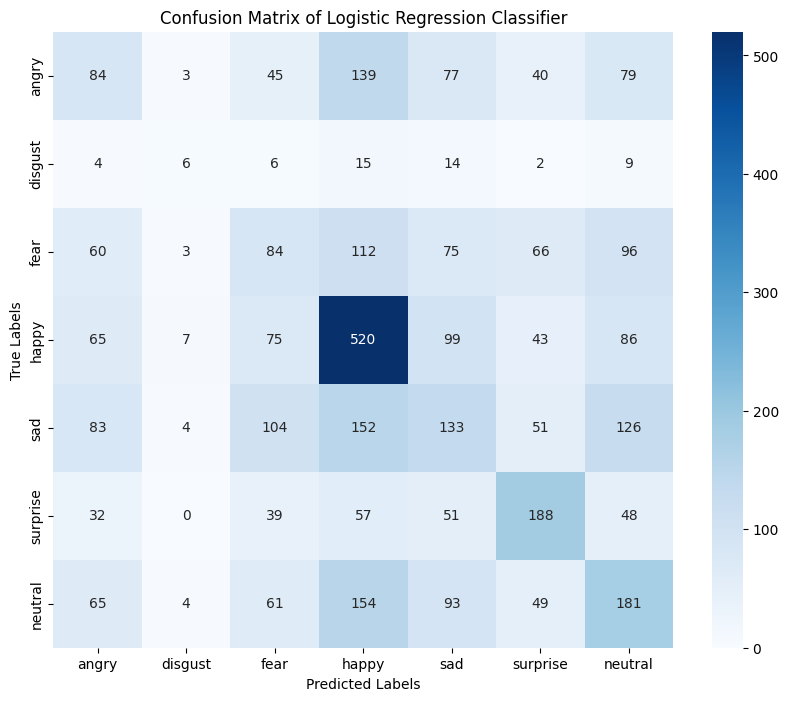

In [ ]:
# Compute confusion matrix for logistic regression
conf_matrix_log_reg = confusion_matrix(y_test_labels, y_pred_log_reg)

# Plot confusion matrix for logistic regression
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Logistic Regression Classifier')
plt.show()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
# Initialize the SVM classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', gamma='scale')

# Train the SVM classifier
svm_classifier.fit(x_training, y_train_labels)

# Predict using the trained SVM classifier
y_pred_svm = svm_classifier.predict(x_testing)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_labels, y_pred_svm)
print(f'Accuracy of SVM classifier: {accuracy_svm:.2f}')

Accuracy of SVM classifier: 0.45


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

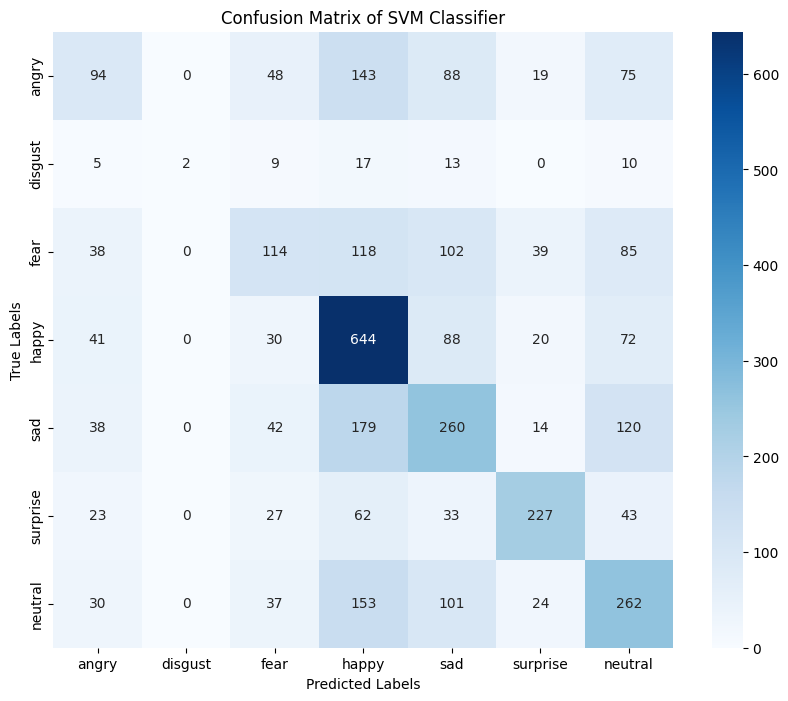

In [ ]:
# Compute confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test_labels, y_pred_svm)

# Map numeric labels to emotion labels
#emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
emotion_labels = [get_emotion(np.array([i])) for i in range(7)]

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVM Classifier')
plt.show()

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

In [ ]:
# Function to find most similar and least similar categories
def find_similar_classes(conf_matrix):
    num_classes = conf_matrix.shape[0]
    similarity_scores = {}

    for i in range(num_classes):
       for j in range(num_classes):
           if i != j:  # Exclude diagonal elements
               if conf_matrix[i, j] > 0:  # Only consider non-zero values
                  similarity_scores[(i, j)] = conf_matrix[i, j]

    # Sort similarity_scores by values (high to low)
    most_similar = sorted(similarity_scores, key=similarity_scores.get, reverse=True)
    least_similar = sorted(similarity_scores, key=similarity_scores.get)

    return most_similar, least_similar

 # Find most similar and least similar categories
most_similar, least_similar = find_similar_classes(conf_matrix_log_reg)

emotion_labels = [get_emotion(np.array([i])) for i in range(7)]

# Print most similar and least similar categories
print("Most Similar Categories:")
for pair in most_similar[:5]:  # Print top 5 most similar pairs
     print(f"{emotion_labels[pair[0]]} and {emotion_labels[pair[1]]}")

print("\nLeast Similar Categories:")
for pair in least_similar[:5]:  # Print top 5 least similar pairs
    print(f"{emotion_labels[pair[0]]} and {emotion_labels[pair[1]]}")

Most Similar Categories:
neutral and happy
sad and happy
angry and happy
sad and neutral
fear and happy

Least Similar Categories:
disgust and surprise
angry and disgust
fear and disgust
disgust and angry
sad and disgust


[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:

scores = log_reg_classifier.predict_proba(x_testing)

In [ ]:
scores.shape

(3589, 7)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
x_testing_tsne=tsne.fit_transform(scores)

In [ ]:
len(x_testing_tsne)

3589

In [ ]:
x_testing_tsne.shape

(3589, 2)

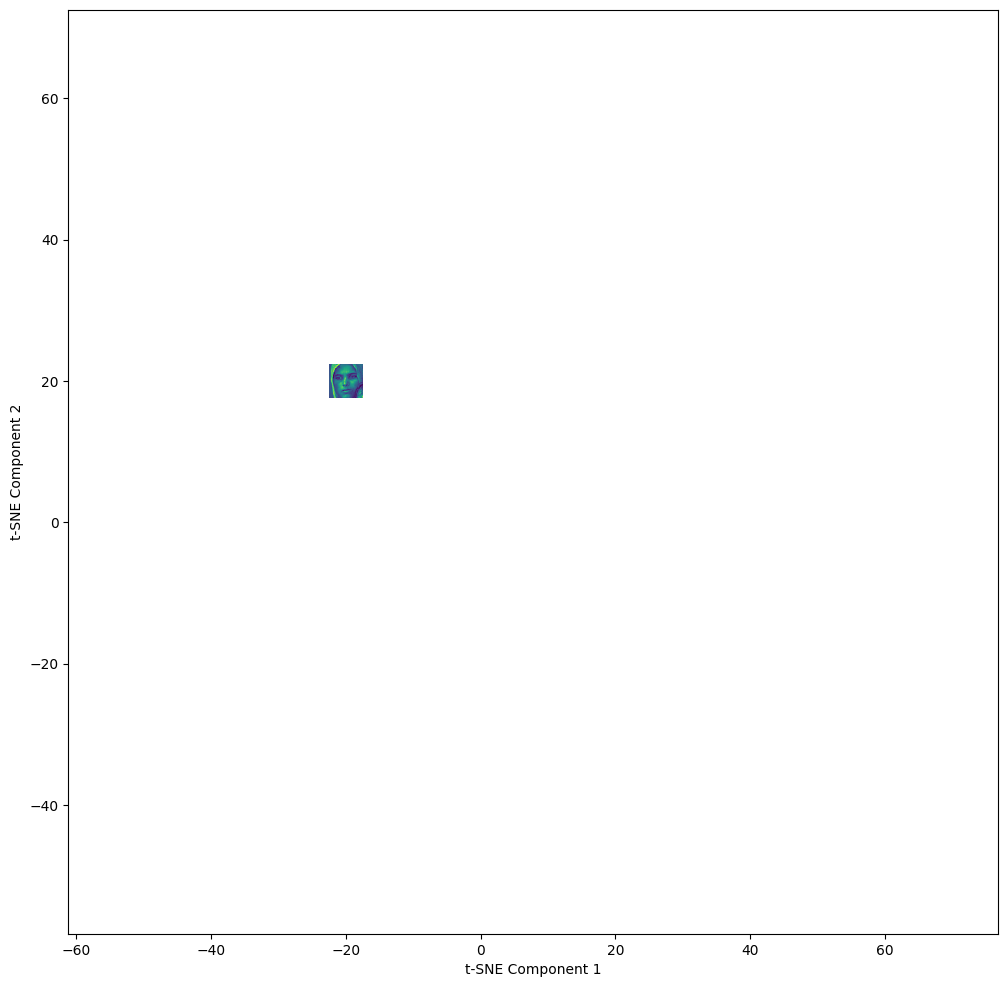

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))
x_testing_tsne_truncated = x_testing_tsne[:len(x_testing_hs_reshaped_truncated)]

# Loop through the embedded scores and images
for i in range(len(x_testing_tsne_truncated)):
    x, y = x_testing_tsne_truncated[i]
    image = x_testing_hs_reshaped_truncated[i].reshape(48, 48)  # Assuming 48x48 images
    imagebox = OffsetImage(image, zoom=0.5)
    ab = AnnotationBbox(imagebox, (x, y), xybox=(-20, 20), frameon=False)
    ax.add_artist(ab)

# Set axis limits and labels
ax.set_xlim(x_testing_tsne_truncated[:, 0].min(), x_testing_tsne_truncated[:, 0].max())
ax.set_ylim(x_testing_tsne_truncated[:, 1].min(), x_testing_tsne_truncated[:, 1].max())
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')

# Show the plot
plt.show()